In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Load genre hierarchy
df = pd.read_csv("../data/fma_metadata/genres.csv")  # adjust path as needed

# Build a directed graph from parent-child relations
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_node(int(row["genre_id"]))
    parent = int(row["parent"])
    if parent != 0:  # 0 means no parent (top-level genre)
        G.add_edge(parent, int(row["genre_id"]))

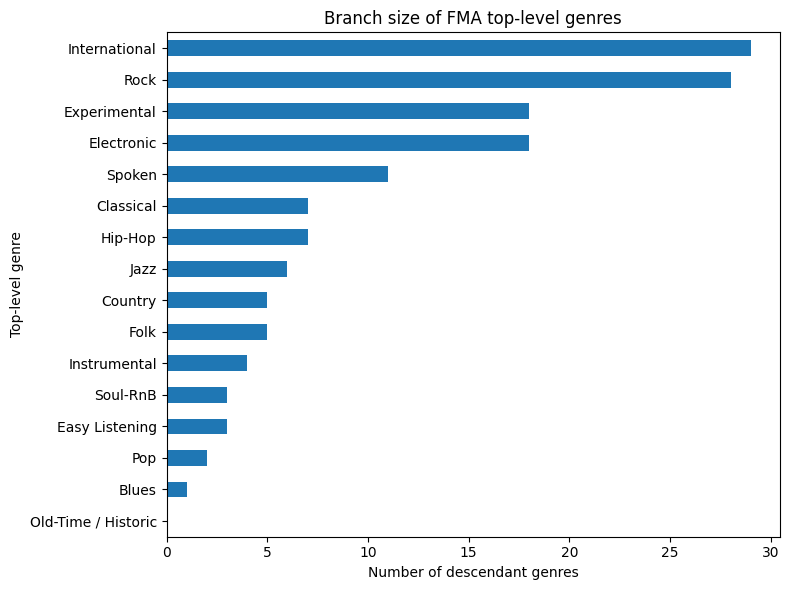

In [3]:


# Compute subtree sizes (including the node itself)
order = list(nx.topological_sort(G))
subtree_size = {v: 1 for v in G.nodes()}  
for v in reversed(order):     
    for child in G.successors(v):
        subtree_size[v] += subtree_size[child]

# Top-level genres (parent == 0)
roots = df.loc[df["parent"] == 0, "genre_id"].astype(int).tolist()
root_titles = (df.set_index("genre_id")
                 .loc[roots, "title"]
                 .astype(str))

# Get number of descendents per top-level genre (excluding the node itself)
root_counts = pd.Series({gid: max(subtree_size.get(gid, 1) - 1, 0) for gid in roots})
root_counts.index = root_titles.tolist()

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
root_counts.sort_values().plot.barh(ax=ax)
ax.set_xlabel("Number of descendant genres")
ax.set_ylabel("Top-level genre")
ax.set_title("Branch size of FMA top-level genres")
plt.tight_layout()
plt.savefig("graphics/top_level_genre_branches.png", dpi=200, bbox_inches="tight")
plt.show()
